<a href="https://colab.research.google.com/github/CelciusZ/Tumor-Detection-with-Convolutional-Neural-Network-CNN-/blob/main/Brain_Tumor_6k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount("/gdrive", force_remount=True)
%cd /gdrive/MyDrive/'Colab Notebooks'/input1500/

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/input1500


In [ ]:
ls

no/  proje/  proje.h5  proje.tf/  Tumor_Model_High/  yes/


In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
import time

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [ ]:
# This cell updates result list for images with tumor
resolution=64
data = []
paths = []
result = []

for r, d, f in os.walk(r'/gdrive/MyDrive/Colab Notebooks/input1500/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((resolution,resolution))
    img = np.array(img)
    if(img.shape == (resolution,resolution,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

paths = []
for r, d, f in os.walk(r"/gdrive/MyDrive/Colab Notebooks/input1500/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((resolution,resolution))
    img = np.array(img)
    if(img.shape == (resolution,resolution,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape
print(data.shape[0])

5899


In [ ]:
result = np.array(result)
result = result.reshape(data.shape[0],2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.15, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), input_shape=(resolution,resolution, 3), padding = 'Same'))
model.add(Conv2D(8, kernel_size=(3,3),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))


lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss = "categorical_crossentropy", optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 8)        32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 8)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        1

In [ ]:
y_train.shape

(5014, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs =50, batch_size = 64, verbose = 1 ,validation_data = (x_test, y_test))

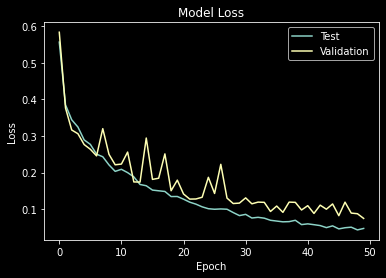

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from matplotlib.pyplot import imshow

#Just Checking the Model
def names(number):
    if number==0:
        return 'Tumor Positive'
    else:
        return 'Tumor Negative'

def predict_tumor2(img):
  x = np.array(img.resize((resolution,resolution)))
  x = x.reshape(1,resolution,resolution,3)
  res = model.predict_on_batch(x)
  classification = np.where(res == np.amax(res))[1][0]
  imshow(img)
  print(str(res[0][classification]*100) +"%   "+ names(classification))


In [ ]:
img = Image.open(r"/gdrive/Othercomputers/PC2/input1500/yes/y35.jpg")
total_time=0
for i in range(1000):
  start=time.time()
  predict_tumor2(img)
  end=time.time()
  predict_time=(end-start)/1000
  total_time+=predict_time
print(total_time)

In [ ]:
img2=Image.open(r'/gdrive/MyDrive/Colab Notebooks/input1500/no/No12.jpg')
total_time=0
for i in range(1000):
  start=time.time()
  predict_tumor2(img2)
  end=time.time()
  predict_time=(end-start)/1000
  total_time+=predict_time
print(total_time)

In [ ]:
model.save('proje')

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('proje')

In [ ]:
from matplotlib.pyplot import imshow

#Just Checking the Model
def names(number):
    if number==0:
        return 'TUMOR POSITIVE'
    else:
        return 'TUMOR NEGATIVE'

def predict_tumor2(img):
  x = np.array(img.resize((64,64)))
  x = x.reshape(1,64,64,3)
  res = model2.predict_on_batch(x)
  classification = np.where(res == np.amax(res))[1][0]
  imshow(img)
  print(str(res[0][classification]*100) + '%    ' + names(classification))


99.99998807907104%    TUMOR NEGATIVE


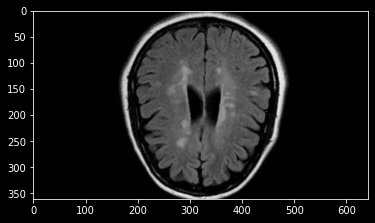

In [ ]:
img2=Image.open(r'/gdrive/Othercomputers/PC2/input1500/no/No15.jpg')
predict_tumor2(img2)


99.97826218605042%    TUMOR POSITIVE


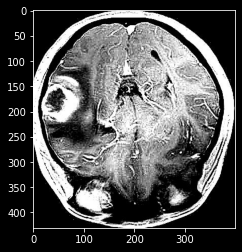

In [ ]:
img = Image.open(r"/gdrive/Othercomputers/PC2/input1500/yes/y36.jpg")
predict_tumor2(img)
